In [1]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('ggplot') 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
uk_pol_final = pd.read_csv('uk_pol_final.csv')

In [3]:
uk_pol_final.head()

,speaker,party,date,subject,text
0,Mark Isherwood,Conservative,2006-01-10,Fuel Poverty,The Chartered Institute of Housing Cymru state...
1,Chuka Umunna,Labour,2011-12-02,Universities UK,Thank you for that kind welcome. I am hugely g...
2,Chuka Umunna,Labour,2012-01-12,High Pay Commission,Thank you for that introduction Michael and to...
3,Chuka Umunna,Labour,2012-06-26,Hub Westminster,"Thank you for that introduction, and thank you..."
4,Chuka Umunna,Labour,2012-05-28,UCATT Conference,"Conference, thank you so very much for invitin..."


In [4]:
speakers = list(uk_pol_final.speaker.value_counts().index)

In [5]:
speakers_inits = [''.join([name[:3] for name in x.split(' ')]) for x in speakers]

In [6]:
uk_pol_final[uk_pol_final.speaker.str.startswith('Har')]

,speaker,party,date,subject,text
237,Harold Wilson,Labour,1945-10-09,Maiden Speech,I am not sure whether in making a maiden speec...
238,Harold Wilson,Labour,1965-01-25,Memorial Winston Churchill,"I beg to move, That an humble Address be prese..."
239,Harold Wilson,Labour,1984-03-14,Maiden Speech,"My Lords, in hoping for the indulgence of the ..."
1256,Harriett Baldwin,Conservative,2016-01-14,Green Finance,"Thank you, Lord Mayor, for your kind words of ..."
1257,Harriett Baldwin,Conservative,2016-02-22,Speech at FinTech Week,It is great to be here to kick off Fintech Wee...
1258,Harriett Baldwin,Conservative,2016-04-11,Speech at FinTech,Thank you for inviting me here today. It is a ...
1259,Harriett Baldwin,Conservative,2016-04-13,Financial Advice,Good morning I’m very pleased indeed to be her...
1260,Harriett Baldwin,Conservative,2016-04-13,Tax Avoidance and Evasion,I am again delighted to be given the opportuni...
1261,Harriett Baldwin,Conservative,2016-04-28,Financial Centres,"For those of you who don’t know me, I’m the Ec..."
1262,Harriett Baldwin,Conservative,2016-05-10,Speech at City Week,Tomorrow I will have been the Economic Secreta...


Drop Harry Harpham so we can shorten names to 3 characters from First and Surname

In [7]:
uk_pol_final.shape

(2600, 5)

In [8]:
uk_pol_final.drop(1678, inplace=True)

In [9]:
uk_pol_final.shape

(2599, 5)

In [10]:
speakers = uk_pol_final.groupby(['speaker','party'])['subject'].count().reset_index()
speakers.columns=['speaker','party','speeches']

In [11]:
speakers['inits'] = speakers.speaker.map(lambda x: '\n'.join([name[:3] for name in x.split(' ')]))

In [12]:
speakers.head()

,speaker,party,speeches,inits
0,Adam Afriyie,Conservative,6,Ada\nAfr
1,Adam Holloway,Conservative,1,Ada\nHol
2,Adrian Bailey,Labour,1,Adr\nBai
3,Airey Neave,Conservative,2,Air\nNea
4,Alan Duncan,Conservative,12,Ala\nDun


In [13]:
speakers_top = speakers.sort_values('speeches',ascending=False).head(20)

In [14]:
speakers_top

,speaker,party,speeches,inits
107,David Cameron,Conservative,178,Dav\nCam
413,Theresa May,Conservative,152,The\nMay
296,Matthew Hancock,Conservative,62,Mat\nHan
164,George Osborne,Conservative,56,Geo\nOsb
172,Gordon Brown,Labour,55,Gor\nBro
435,William Hague,Conservative,49,Wil\nHag
306,Michael Gove,Conservative,48,Mic\nGov
384,Sajid Javid,Conservative,44,Saj\nJav
138,Ed Miliband,Labour,40,Ed\nMil
320,Nick Gibb,Conservative,40,Nic\nGib


In [15]:
print(speakers.iloc[0,3])

Ada
Afr


In [16]:
mentions = {}

speaker_names = list(speakers_top.speaker)

for name1 in speaker_names:
    mentions[name1]={}

In [17]:
mentions

{'David Cameron': {},
 'Theresa May': {},
 'Matthew Hancock': {},
 'George Osborne': {},
 'Gordon Brown': {},
 'William Hague': {},
 'Michael Gove': {},
 'Sajid Javid': {},
 'Ed Miliband': {},
 'Nick Gibb': {},
 'John Major': {},
 'Nick Clegg': {},
 'Jeremy Corbyn': {},
 'Alan Milburn': {},
 'Tony Blair': {},
 'Jeremy Hunt': {},
 'John Hutton': {},
 'Iain Duncan Smith': {},
 'Justine Greening': {},
 'Boris Johnson': {}}

In [18]:
uk_pol_final.head()

,speaker,party,date,subject,text
0,Mark Isherwood,Conservative,2006-01-10,Fuel Poverty,The Chartered Institute of Housing Cymru state...
1,Chuka Umunna,Labour,2011-12-02,Universities UK,Thank you for that kind welcome. I am hugely g...
2,Chuka Umunna,Labour,2012-01-12,High Pay Commission,Thank you for that introduction Michael and to...
3,Chuka Umunna,Labour,2012-06-26,Hub Westminster,"Thank you for that introduction, and thank you..."
4,Chuka Umunna,Labour,2012-05-28,UCATT Conference,"Conference, thank you so very much for invitin..."


In [19]:
for i,row in uk_pol_final.iterrows():
    if row.speaker in speaker_names:
        for name in speaker_names:
            if name!=row.speaker:
                if name in row.text:
                    if name in mentions[row.speaker].keys():
                        mentions[row.speaker][name]+=1
                    else:
                        mentions[row.speaker][name]=1

In [20]:
mentions

{'David Cameron': {'Gordon Brown': 19,
  'Tony Blair': 17,
  'Iain Duncan Smith': 5,
  'George Osborne': 10,
  'Alan Milburn': 2,
  'Nick Clegg': 6,
  'Jeremy Hunt': 2,
  'John Major': 2,
  'Michael Gove': 5,
  'Theresa May': 6,
  'William Hague': 5,
  'Ed Miliband': 3,
  'Boris Johnson': 3,
  'Sajid Javid': 1,
  'Justine Greening': 1,
  'Jeremy Corbyn': 2},
 'Theresa May': {'Gordon Brown': 4,
  'Tony Blair': 4,
  'Iain Duncan Smith': 3,
  'Michael Gove': 7,
  'David Cameron': 8,
  'George Osborne': 3,
  'Ed Miliband': 2,
  'John Major': 3,
  'Jeremy Hunt': 1,
  'Justine Greening': 1,
  'Boris Johnson': 2,
  'Jeremy Corbyn': 3,
  'Matthew Hancock': 1,
  'Sajid Javid': 3},
 'Matthew Hancock': {'David Cameron': 1, 'Michael Gove': 1},
 'George Osborne': {'David Cameron': 12,
  'Gordon Brown': 6,
  'Nick Clegg': 3,
  'Michael Gove': 3,
  'Jeremy Hunt': 2,
  'Iain Duncan Smith': 1,
  'William Hague': 4,
  'Tony Blair': 3,
  'John Major': 1,
  'John Hutton': 1,
  'Boris Johnson': 1,
  'Sajid

In [21]:
edges_list = [(i,j,y) for i,x in mentions.items() for j,y in x.items() if y>1]

In [22]:
G = nx.DiGraph()

In [23]:
G.add_nodes_from(mentions.keys())

for node1, node2, weight in edges_list:
    G.add_edge(node1, node2, weight=weight)

In [24]:
np.unique(speakers.party)

array(['Conservative', 'DUP', 'Greens', 'Labour', 'Lib Dem',
       'Plaid Cymru', 'SNP', 'Sinn Féin', 'UKIP', 'UUP'], dtype=object)

In [25]:
color_dict = {'Conservative':'#0087DC',
              'Labour':'#DC241f',
              'Lib Dem':'#FAA61A',
              'DUP':'#D46A4C',
              'Greens':'#008066',
              'Plaid Cymru':'#3F8428',
              'SNP':'#FFF95D',
              'Sinn Féin':'#008800',
              'UKIP':'#EFE600',
              'UUP':'#9999FF'}

color_list = pd.Series(G.nodes).map(lambda x: color_dict[speakers[speakers.speaker==x].party.iloc[0]])

In [26]:
inits_list = pd.Series(G.nodes).map(lambda x: speakers[speakers.speaker==x].inits.iloc[0])

In [27]:
split_names = pd.Series(G.nodes).map(lambda x: '\n'.join([y for y in x.split(' ')]))

In [28]:
labels = {a:b for a,b in zip(G.nodes,inits_list)}

In [29]:
labels2 = {a:b for a,b in zip(G.nodes,split_names)}

In [30]:
node_sizes = pd.Series(G.nodes).map(lambda x: speakers[speakers.speaker==x].speeches.iloc[0]*200)

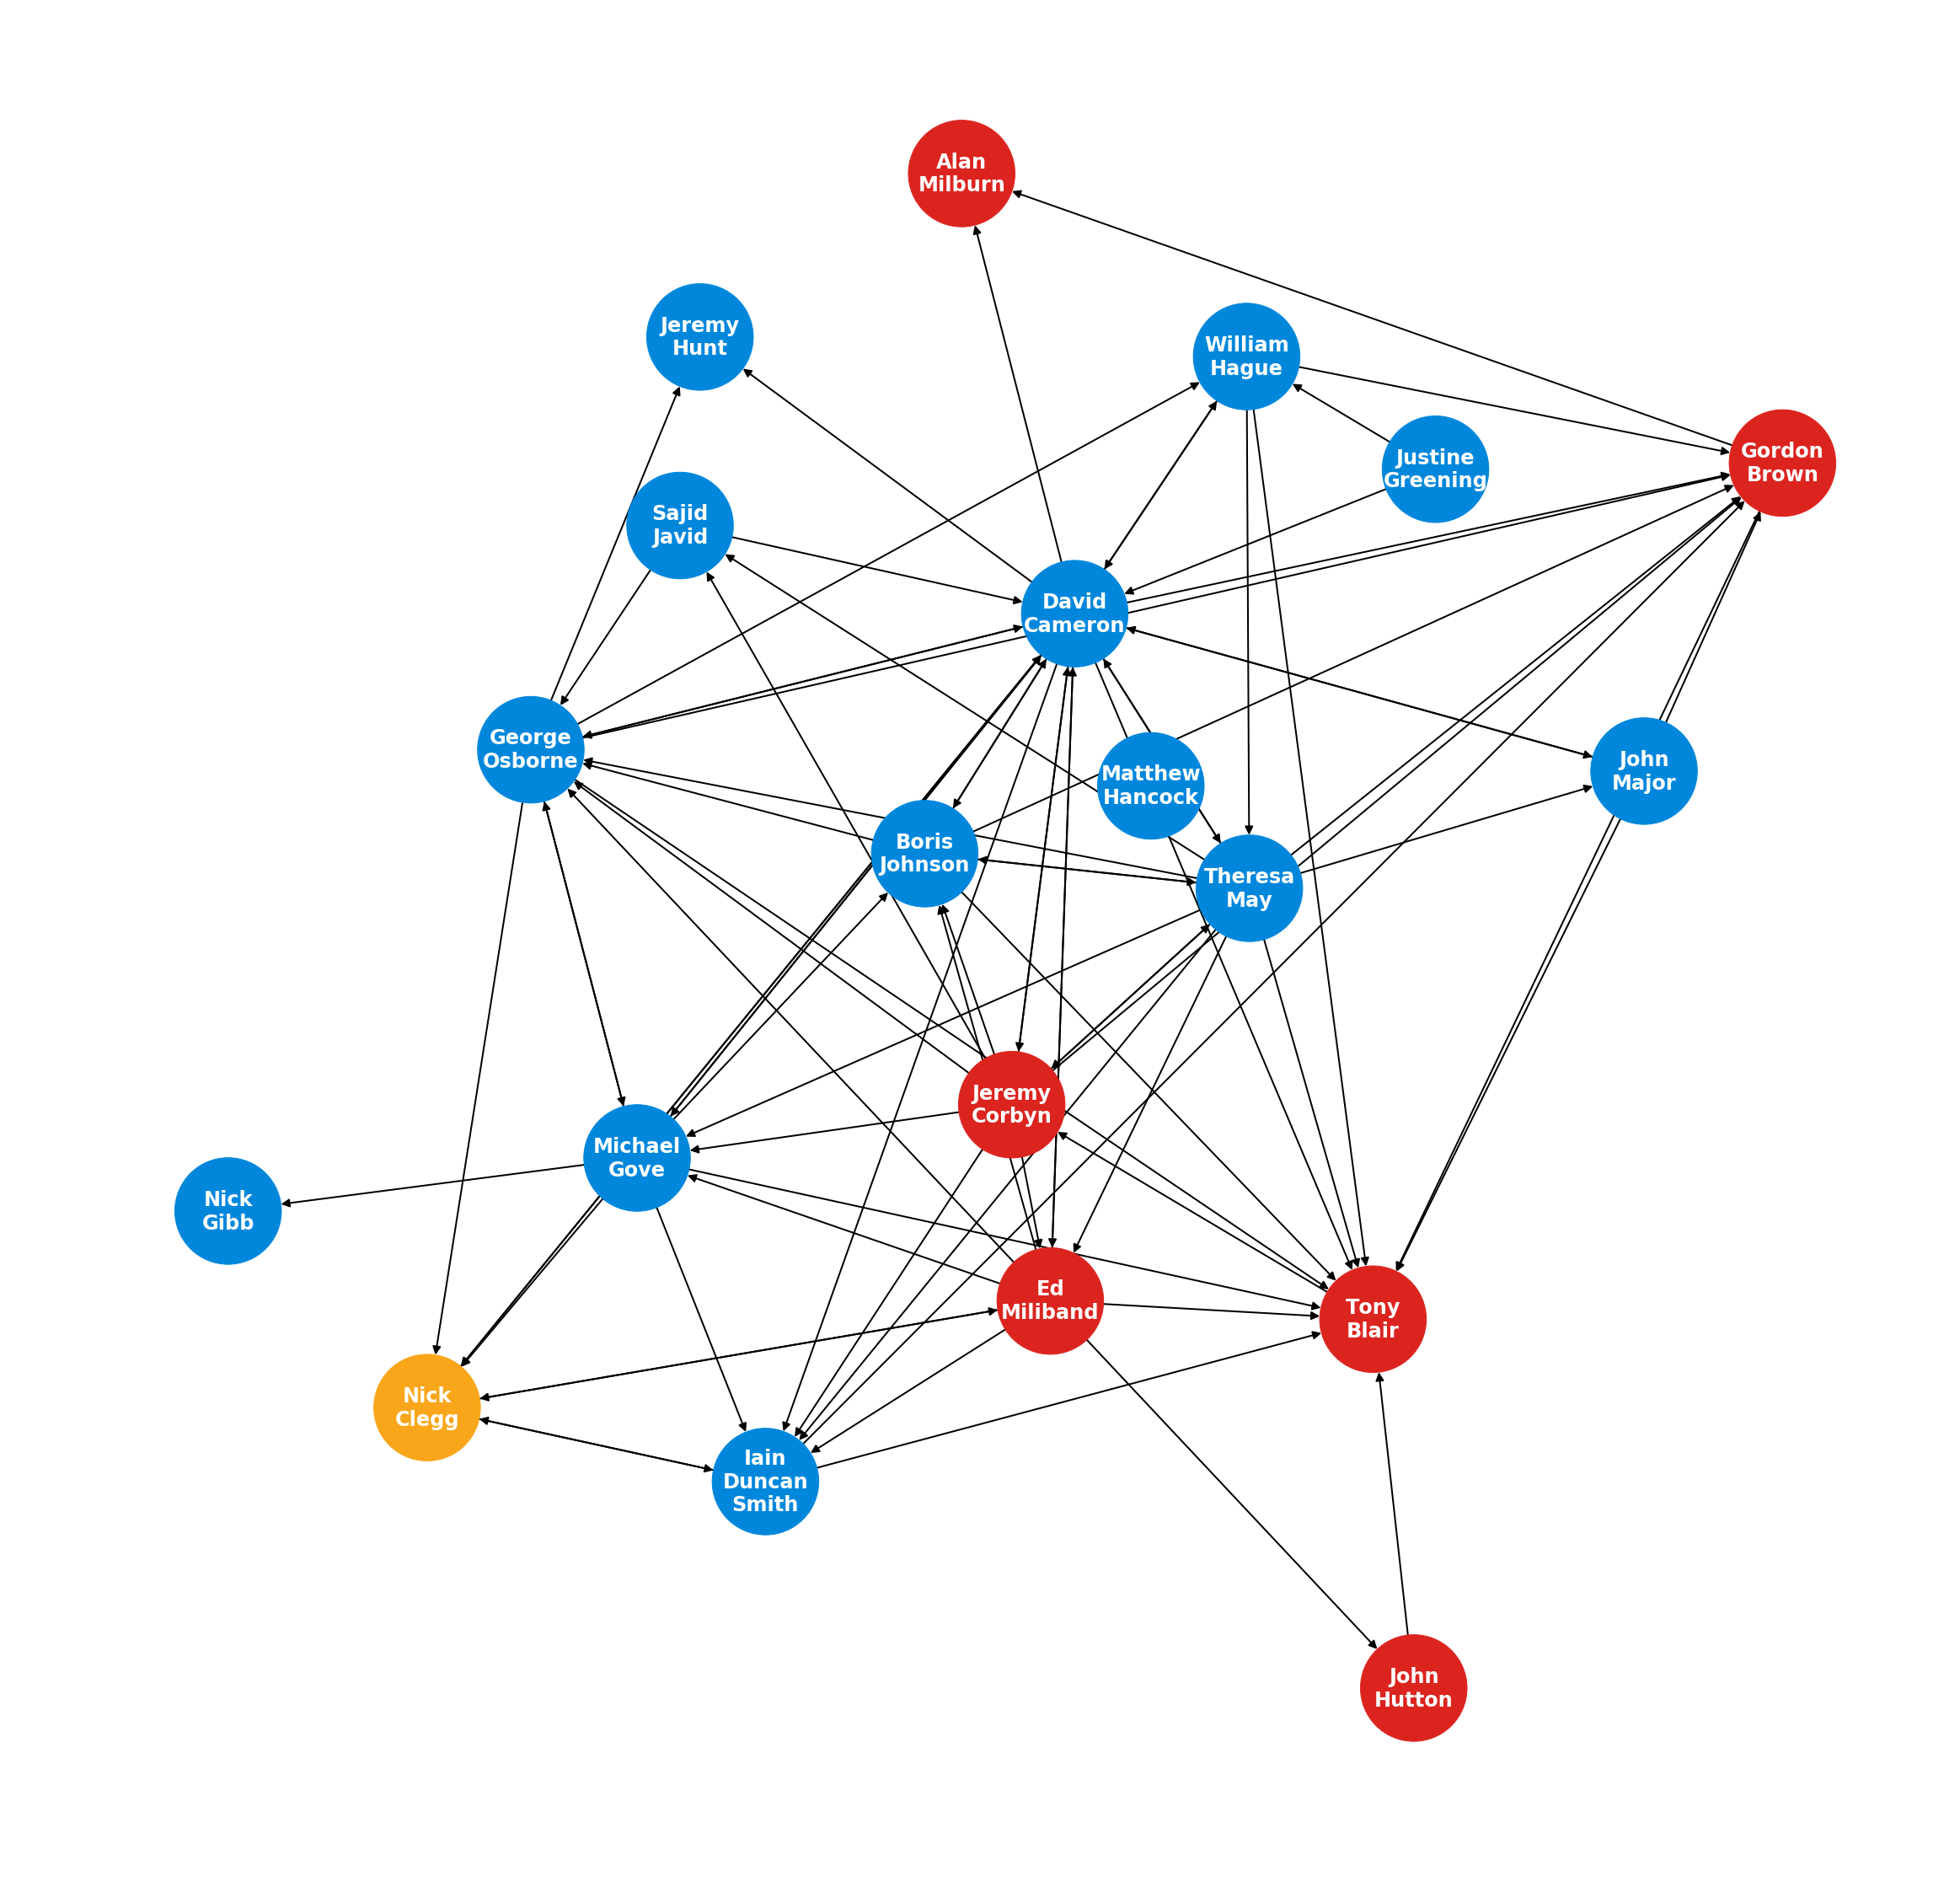

In [31]:
fig, ax = plt.subplots(figsize=(20,20))

nx.draw_kamada_kawai(G,
                     labels=labels2,
#                      node_size=node_sizes,
                     node_size=4000,
                     node_color=color_list,
                     node_shape='o',width=1,
                     font_color='white',font_weight='bold',
                     ax=ax)

plt.show();

### Let's use all of the speakers and do some analysis

In [32]:
mentions_all = {}

speaker_names = list(speakers.speaker)

for name in speaker_names:
    mentions_all[name]={}
    
for i,row in uk_pol_final.iterrows():
    if row.speaker in speaker_names:
        for name in speaker_names:
            if name!=row.speaker:
                if name in row.text:
                    if name in mentions_all[row.speaker].keys():
                        mentions_all[row.speaker][name]+=1
                    else:
                        mentions_all[row.speaker][name]=1

edges_list = [(i,j,y) for i,x in mentions_all.items() for j,y in x.items()]

G_all = nx.DiGraph()

G_all.add_nodes_from(mentions.keys())

for node1, node2, weight in edges_list:
    G_all.add_edge(node1, node2, weight=weight)

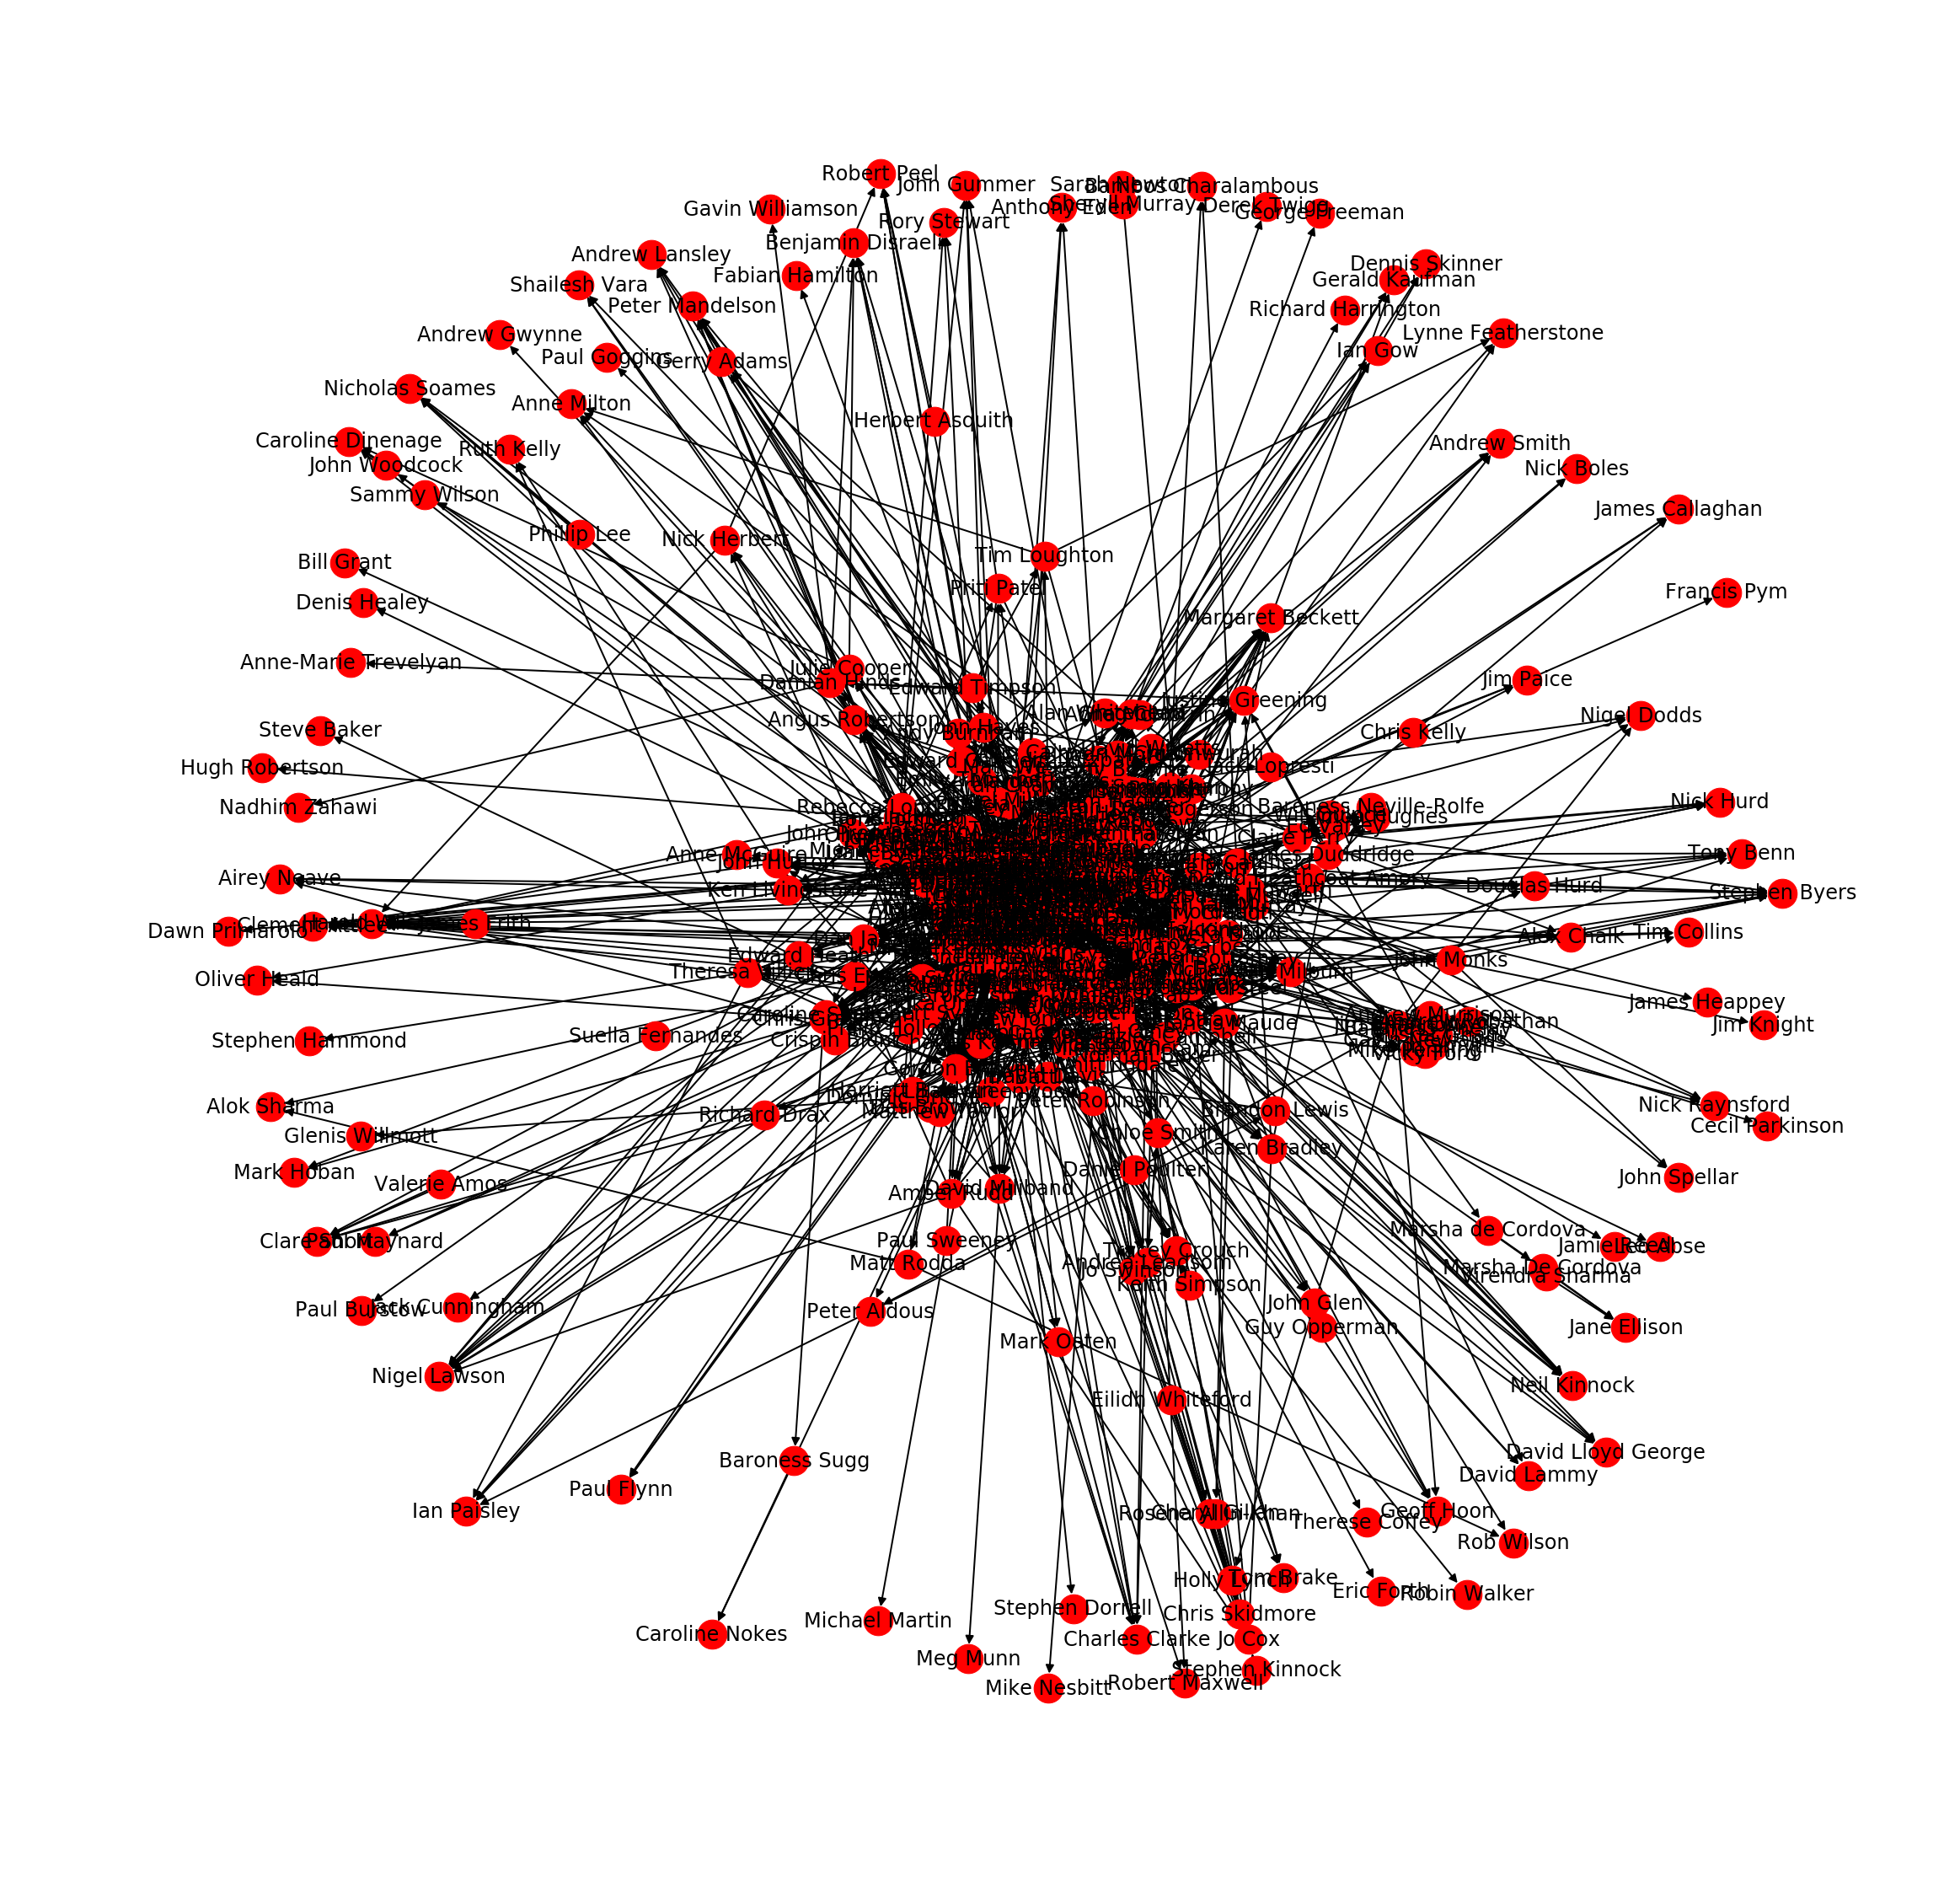

In [34]:
fig, ax = plt.subplots(figsize=(20,20))

nx.draw(G_all,with_labels=True,ax=ax)

plt.show();

In [40]:
print(G_all.in_degree('Francis Pym'))
print(G_all.out_degree('Francis Pym'))

1
0


In = being mentioned<br>
Out = mentioning someone

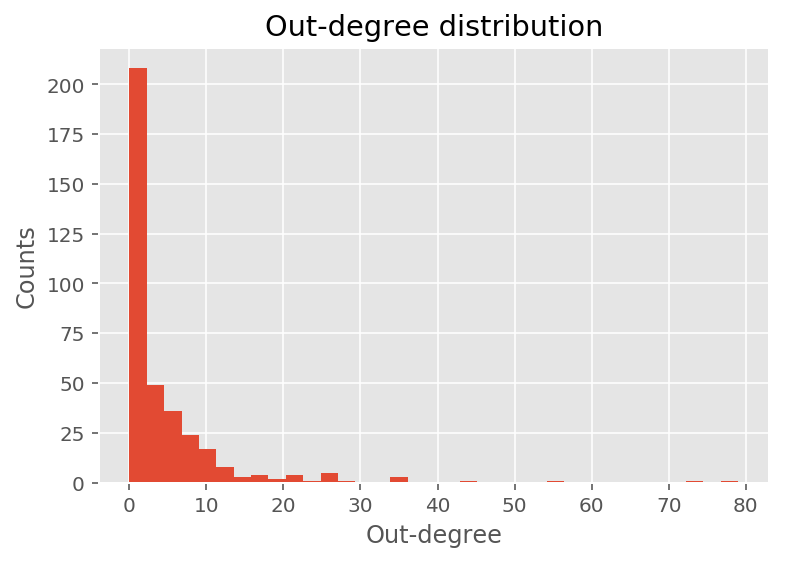

In [43]:
plt.hist(list(dict(G_all.out_degree()).values()),bins=35)
plt.xlabel('Out-degree')
plt.ylabel('Counts')
plt.title('Out-degree distribution')
plt.show()

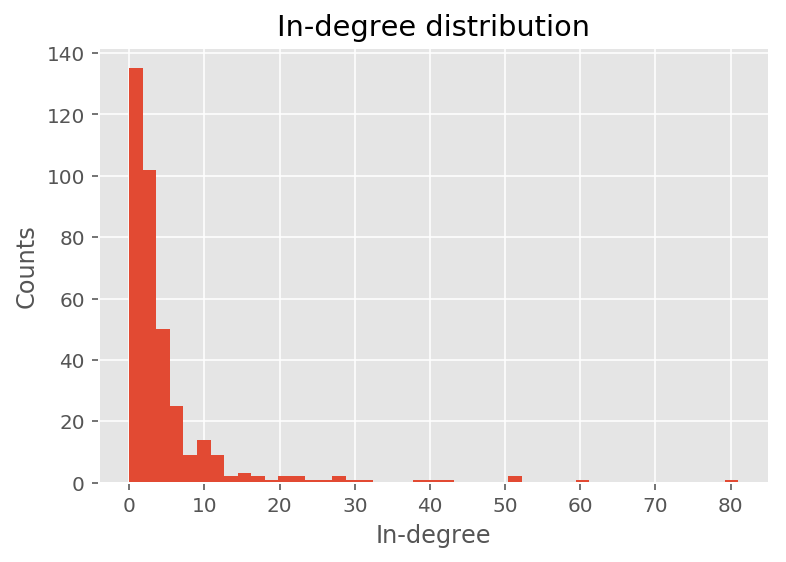

In [42]:
plt.hist(list(dict(G_all.in_degree()).values()),bins=45)
plt.xlabel('In-degree')
plt.ylabel('Counts')
plt.title('In-degree distribution')
plt.show()

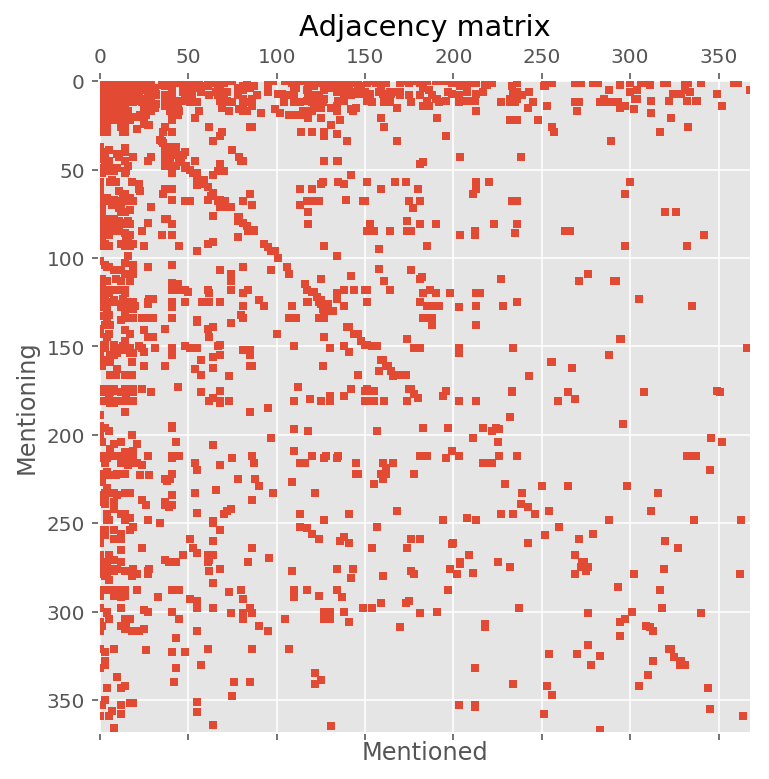

In [44]:
plt.figure(figsize=(6,6))
plt.spy(nx.adjacency_matrix(G_all),markersize=3)
plt.xlabel('Mentioned')
plt.ylabel('Mentioning')
plt.title('Adjacency matrix')
plt.show()

In [45]:
scc = list(max(nx.strongly_connected_components(G_all), key=len))

IN_component = [list(G_all.predecessors(n)) for n in scc]
IN_component = sorted(list(set(np.unique(np.concatenate(IN_component))) - set(scc)))

OUT_component = [list(G_all.successors(n)) for n in scc]
OUT_component = sorted(list(set(np.unique(np.concatenate(OUT_component))) - set(scc)))

In [46]:
bowtie = scc + IN_component + OUT_component

In [47]:
print(len(scc))
print(len(IN_component))
print(len(OUT_component))
print(len(bowtie))

225
39
91
355


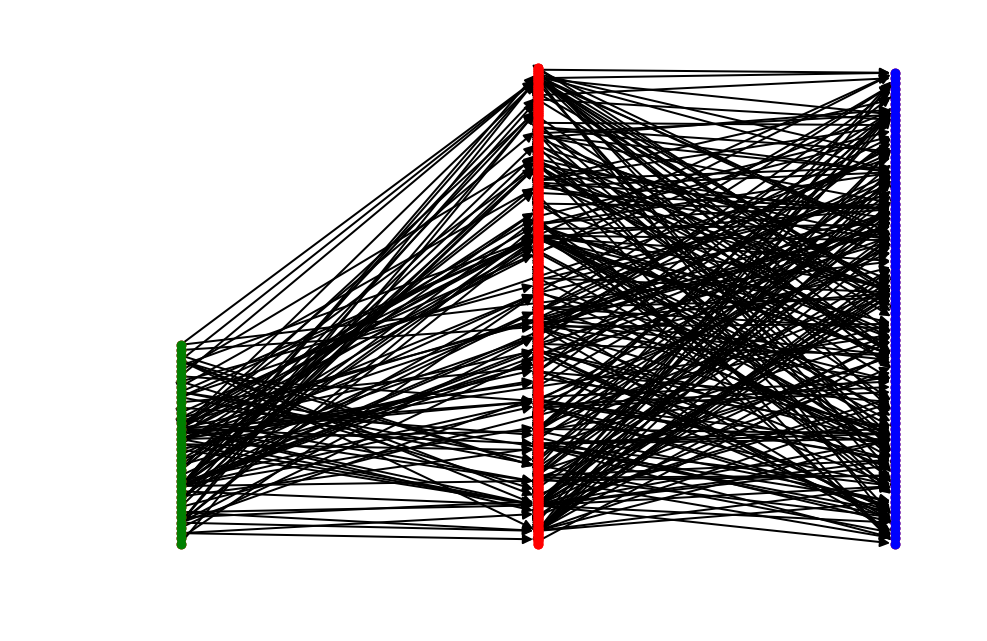

In [59]:
G_bowtie = G_all.subgraph(bowtie)

#defining the proper layout
pos = {}
in_y_0 = 100
in_y = in_y_0
pos[scc[0]] = (150, in_y)

in_step = 1000
for in_n in IN_component:
    pos[in_n] = (100, in_y)
    in_y += in_step

out_y = 100
out_step = 1000   
for out_n in OUT_component:
    pos[out_n] = (200, out_y)
    out_y += out_step

sccpos = np.linspace(in_y_0,out_y,len(scc))
i = 0
for scc_n in scc:
    pos[scc_n] = (150, sccpos[i])
    i += 1
#plot the bowtie structure
nx.draw(G_bowtie, pos, node_size=20, arrows=True)

nx.draw_networkx_nodes(G_bowtie, pos, IN_component, node_size=20, node_color='green')
nx.draw_networkx_nodes(G_bowtie, pos, OUT_component, node_size=20, node_color='blue')
nx.draw_networkx_nodes(G_bowtie, pos, scc, node_size=20, node_color='red')
plt.show()